# Lasso regression

- Prepared By: Ammar Nassan Alhaj Ali.
- Date: 2020-10-17.
- References: 1-introduction to machine learning with python a guide for data scientists 2017 (Andreas C. Müller and Sarah Guido).

- An alternative to Ridge for regularizing linear regression is the Lasso. The lasso also
restricts coefficients to be close to zero, similarly to Ridge regression, but in a slightly
different way,
-  when using the Lasso, some coefficients are exactly zero. This means some features are entirely ignored by the model.

In [27]:
import mglearn
X, y = mglearn.datasets.load_extended_boston()
print("X.shape: {}".format(X.shape))

X.shape: (506, 104)


In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [29]:
from sklearn.linear_model import Ridge
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge01.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge01.score(X_test, y_test)))

Training set score: 0.93
Test set score: 0.77


In [30]:
import numpy as np
from sklearn.linear_model import Lasso
lasso = Lasso().fit(X_train, y_train)
print("training set score: %f" % lasso.score(X_train, y_train))
print("test set score: %f" % lasso.score(X_test, y_test))
print("number of features used: %d" % np.sum(lasso.coef_ != 0))


training set score: 0.293238
test set score: 0.209375
number of features used: 4


In [31]:
lasso001 = Lasso(alpha=0.01).fit(X_train, y_train)
print("training set score: %f" % lasso001.score(X_train, y_train))
print("test set score: %f" % lasso001.score(X_test, y_test))
print("number of features used: %d" % np.sum(lasso001.coef_ != 0))

training set score: 0.896112
test set score: 0.767800
number of features used: 32


In [32]:
lasso00001 = Lasso(alpha=0.0001).fit(X_train, y_train)
print("training set score: %f" % lasso00001.score(X_train, y_train))
print("test set score: %f" % lasso00001.score(X_test, y_test))
print("number of features used: %d" % np.sum(lasso00001.coef_ != 0))

training set score: 0.942093
test set score: 0.697654
number of features used: 100


Text(0, 0.5, 'Coefficient magnitude')

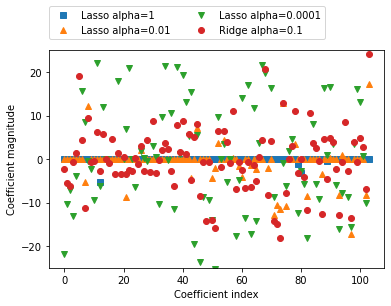

In [33]:
import matplotlib.pyplot as plt
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")
plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")

In practice, Ridge regression is usually the first choice between these two models.
However, if you have a large amount of features and expect only a few of them to be
important, Lasso might be a better choice. Similarly, if you would like to have a
model that is easy to interpret, Lasso will provide a model that is easier to understand,
as it will select only a subset of the input features.